# Viral Tweets

In this project, we are going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. Before jumping into using the classifier, let's first consider the problem we're trying to solve. Which features of a tweet are most closely linked to its popularity? Maybe the number of hashtags or the number of links in the tweet strongly influences its popularity. Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

In [29]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[25]['text'])
print("User",all_tweets.loc[25]['user'])
print("User coordinates",all_tweets.loc[25]['coordinates'])
print("User",all_tweets.loc[25]['entities'])
# print(all_tweets.info())

# all_tweets.head()

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
@Liquidachi Oh waittttt I found it 👀
User {'id': 559880125, 'id_str': '559880125', 'name': 'LA', 'screen_name': 'The_Real_LA2', 'location': 'San Antonio, Texas', 'description': "Alah and rowdy are words I use on the daily. Don't mistake my kindness for loveness. Welcome to mi vida loca in 140 characters. One tweet at a time.", 'url': None, 'entities': {'description': {'urls': []}}, 'protected': Fa

# Defining Viral Tweets

A K-Nearest Neighbor classifier is a supervised machine learning algorithm, and as a result, we need to have a dataset with tagged labels. For this specific example, we need a dataset where every tweet is marked as viral or not viral. Unfortunately, this isn't a feature of our dataset &mdash; we'll need to make it ourselves.

So how do we define a viral tweet? A good place to start is to look at the number of retweets the tweet has. This can be found using the feature `"retweet_count"`. we wanted to create a column called `is_viral` that is a `1` if the tweet had more than `13` retweets and `0` otherwise. We could do that like this:


In [32]:
import numpy as np
print(np.median(all_tweets['retweet_count']))
all_tweets['is_viral'] = all_tweets.retweet_count.apply(lambda x : 1 if x >= 13 else 0)
print('Number of Viral tweets in our dataset is',sum(all_tweets['is_viral']))

13.0
Number of Viral tweets in our dataset is 5591


# Making Features

Now that we've created a label for every tweet in our dataset, we can begin thinking about which features might determine whether a tweet is viral. We can create new columns in our dataset to represent these features. For example, let's say we think the length of a tweet might be a valuable feature.Follower Count , Friends Count , Hastag Count , Links Counts etc. are all potential features for viral tweet

In [33]:
all_tweets['tweet_length'] = all_tweets.apply(lambda x: len(x['text']), axis=1)
all_tweets['followers_count'] = all_tweets['user'].apply(lambda x :x['followers_count'])
all_tweets['friends_count'] = all_tweets['user'].apply(lambda x :x['friends_count'])
all_tweets['Hashtag_count'] = all_tweets.apply(lambda x: x['text'].count('#'), axis=1)
all_tweets['Links_count'] = all_tweets.apply(lambda x: x['text'].count('http'), axis=1)

# Creating the Training Set and Test Set


In [40]:
from sklearn.model_selection import train_test_split

labels = all_tweets['is_viral']
features = all_tweets[['tweet_length','followers_count','friends_count','Hashtag_count','Links_count']]

train_features,test_features,train_labels,test_labels = train_test_split(features,labels,random_state=12,test_size=0.2)

# Normalizing The Data


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

# Using the Classifier


In [43]:
from sklearn.neighbors import KNeighborsClassifier
# Base Model
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(scaled_train_features,train_labels)
print(classifier.score(scaled_test_features,test_labels))

0.7135135135135136


# Choosing K


1 0.6675675675675675
2 0.6554054054054054
3 0.7027027027027027
4 0.6959459459459459
5 0.7135135135135136
6 0.7153153153153153
7 0.727027027027027
8 0.7297297297297297
9 0.7297297297297297
10 0.7324324324324324
11 0.7324324324324324
12 0.7261261261261261
13 0.7364864864864865
14 0.7297297297297297
15 0.7265765765765766
16 0.7261261261261261
17 0.7315315315315315
18 0.727027027027027
19 0.7301801801801802


Text(0.5, 1.0, 'Choosing Best K value')

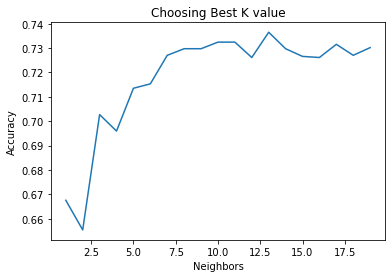

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
score = []
for k in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(scaled_train_features,train_labels)
    score.append(classifier.score(scaled_test_features,test_labels))
    print(k,classifier.score(scaled_test_features,test_labels))
    
sns.lineplot(x=range(1,20),y=score)    
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title('Choosing Best K value')

We can see that k =13 has most accuracy 73.64% .

# Final Model

In [49]:
classifier_final = KNeighborsClassifier(n_neighbors = 13)
classifier_final.fit(scaled_train_features,train_labels)
print(classifier_final.score(scaled_test_features,test_labels))

0.7364864864864865
